In [1]:
import io
import glob

import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# Bring in the utilities module
import sys
sys.path.insert(0, '../util')

# allow hot changes in util.py
import importlib
import util
importlib.reload(util)

from util import fit_Tc, replica_average, read_res

## Convergence analysis: plot `nmnm` distributions

In [3]:
def load_nmnm(fname):
    nmnm = np.loadtxt(fname)
    mask = nmnm[:, 1] > 0
    return nmnm[mask]

def overlay_gaussian(nm):
    """Cook up a gaussian shaped curve with sample 1st and 2nd moments.
    """
    x, y = nm.T
    m1 = (x * y).sum()
    m2 = ((x - m1)**2 * y).sum() 
    
    arr = np.exp(-(x - m1)**2 / 2 / m2)
    arr /= arr.sum()
    return arr 

def plot_nmnm(fnames, fname_unif):
    fig, axx = plt.subplots(len(fnames)//3+1, 3, figsize=(9, 15))

    for fname, ax in zip(fnames, axx.ravel()):
        nm = load_nmnm(fname)

        ax.plot(nm[:, 0], nm[:, 1], 'o')
        ax.plot(nm[:, 0], overlay_gaussian(nm), '-', lw=3)
        ax.set_title( fname.split("/nmnm_")[-1].split(".dat")[0])
        ax.grid(True)
        
        nm_unif = load_nmnm(fname_unif)
        ax.plot(nm_unif[:, 0], nm_unif[:, 1], '--', color='C4')
        
    plt.tight_layout()

## Collect MC data / compute the replica statistics

In [4]:
def resample_g_im(L, beta, reslines, show=False):
    """Read a set of result_XXX files and replica average g_im.
    
    reslines is the list of result_XXX files to process.
    """
    resdict = {"L": L, "beta": beta}
    
    df = read_res(reslines)
    print(reslines)
    
    from IPython.display import display
    display(df)
    
    samples = replica_average(df["g_im"], df["err_g_im"])

    m, s = samples.mean(), samples.std()
    resdict["g_im"] = m
    resdict["err_g_im"] = s
    print(m, '+/-', s)

    if show:
        plt.hist(samples, density=True, bins=100, histtype='step')
        plt.axvline(m, lw=5, color='C1')
        plt.axvspan(m-s, m+s, alpha=0.4, color='C1')
        plt.title(str(m) + "+/-" + str(s))
    return resdict

# Analyze $L=6$

### Analyze $L=6$, $\beta=4.0$

['../runs/amp_0.3/L6/res_L6b4.0r1a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r4a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r21a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r11a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r9a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r7a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r2a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r17a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r15a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r12a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r19a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r20a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r6a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r18a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r13a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r5a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r8a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r16a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r10a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r3a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.0r14a0.3.dat']


,replica_id,density,err_density,conv_density,g_im,err_g_im,conv_g_im,Z(mln)
0,1,0.165875,0.000233,T,0.107152,0.000518,T,384.071303
1,4,0.224669,0.000561,F,0.189646,0.001523,T,116.160154
2,21,0.131989,0.000105,T,0.066963,0.000286,T,1530.720909
3,11,0.149077,0.000157,T,0.085589,0.000292,T,802.688191
4,9,0.132706,0.000153,F,0.067839,0.000232,F,1279.825936
5,7,0.135276,0.000171,T,0.070954,0.000259,T,1172.825103
6,2,0.160318,0.000234,T,0.101885,0.000469,T,440.236747
7,17,0.160952,0.000225,T,0.100879,0.000389,T,730.562469
8,15,0.209601,0.000331,T,0.170246,0.001256,T,192.238714
9,12,0.139147,0.000126,T,0.074549,0.000207,T,1157.332264


0.11459728864131742 +/- 0.00016327059144471167


<IPython.core.display.Javascript object>


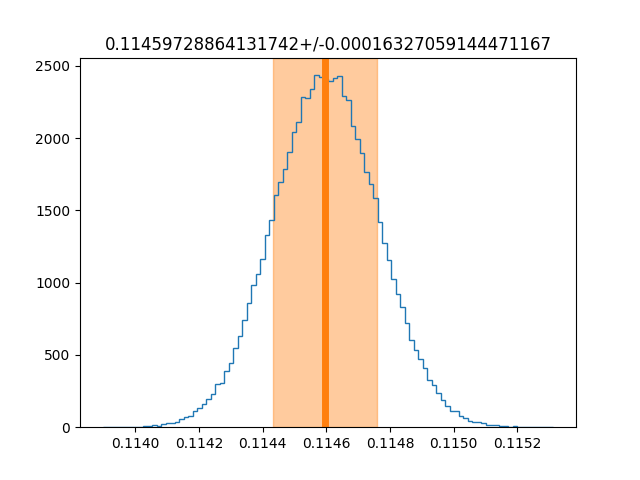

In [5]:
L, beta = 6, 4.0
dct_L6b40 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_0.3/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

<IPython.core.display.Javascript object>


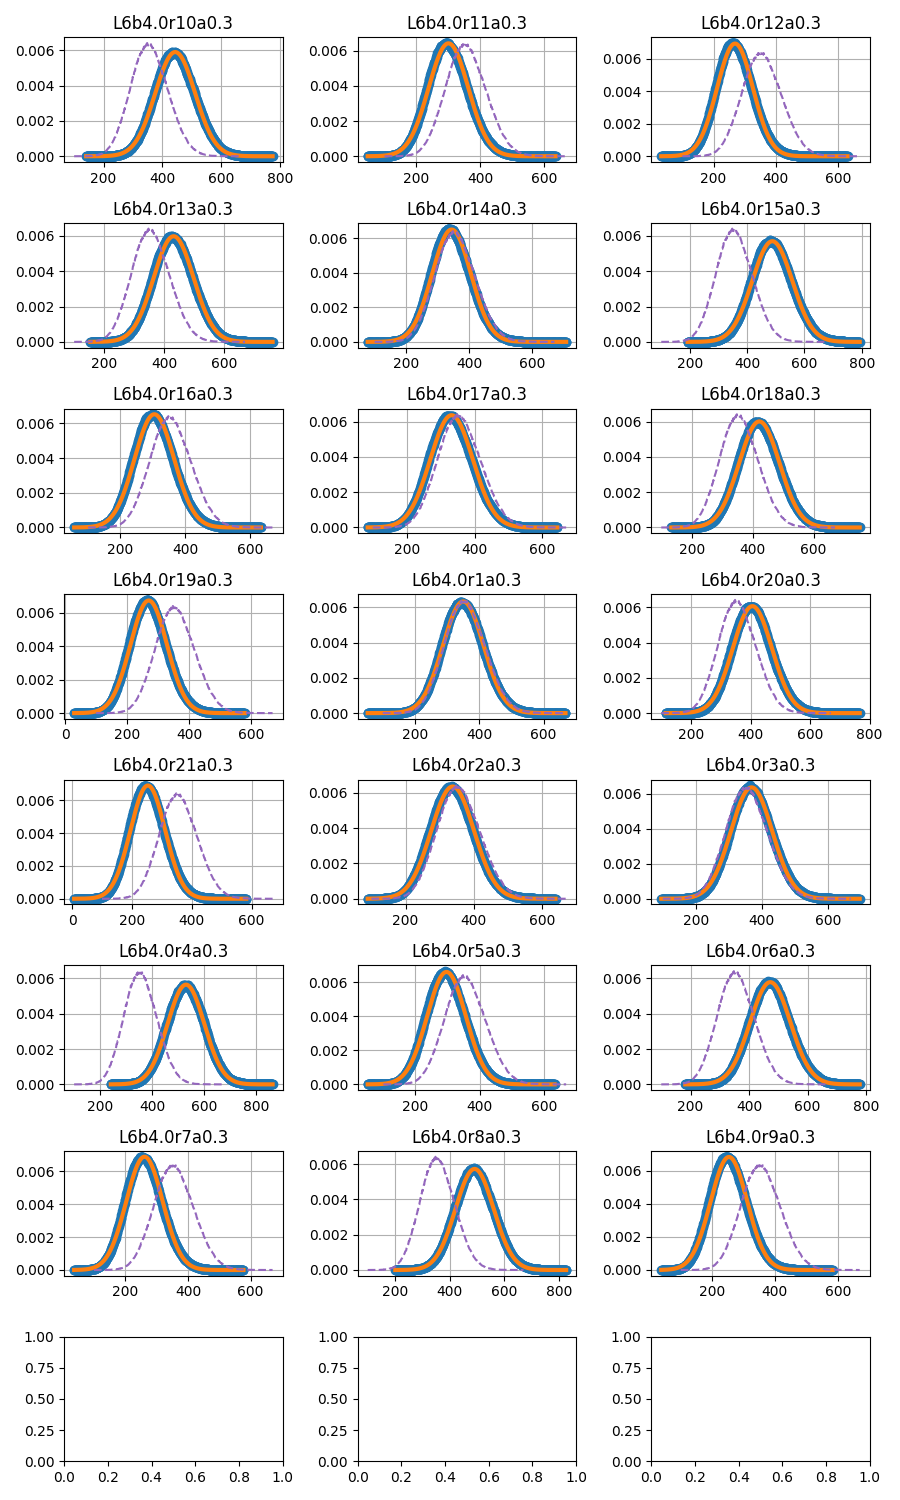

In [7]:
fnames = !ls ../runs/amp_0.3/L6/nmnm_L6b4.0*
fname_unif = '../repro_runs/m5.2L6/nmnm_m5.2L6b4.0_1.dat'
plot_nmnm(fnames, fname_unif)

In [8]:
!ls ../runs/amp_0.3/L6/nmnm_L6b4.0*

../runs/amp_0.3/L6/nmnm_L6b4.0r10a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r11a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r12a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r13a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r14a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r15a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r16a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r17a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r18a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r19a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r1a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r20a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r21a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r2a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r3a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r4a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r5a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r6a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r7a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r8a0.3.dat
../runs/amp_0.3/L6/nmnm_L6b4.0r9a0.3.dat


### Analyze $L=6$, $\beta=4.5$

In [9]:
L, beta = 6, 4.5
dct_L6b45 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_0.3/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

['../runs/amp_0.3/L6/res_L6b4.5r19a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r18a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r4a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r8a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r12a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r5a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r9a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r14a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r1a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r11a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r2a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r10a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r15a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r20a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r3a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r6a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r21a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r17a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r16a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r13a0.3.dat', '../runs/amp_0.3/L6/res_L6b4.5r7a0.3.dat']


,replica_id,density,err_density,conv_density,g_im,err_g_im,conv_g_im,Z(mln)
0,19,0.135711,0.000141,T,0.105302,0.000316,T,651.388166
1,18,0.192814,0.000318,T,0.191039,0.001218,T,135.134455
2,4,0.226516,0.000388,T,0.245844,0.002031,T,85.152441
3,8,0.213763,0.000338,T,0.224103,0.001948,T,91.809037
4,12,0.136492,0.000122,F,0.103258,0.000315,T,641.517923
5,5,0.145964,0.000205,T,0.118796,0.000630,F,541.810754
6,9,0.129530,0.000129,T,0.093413,0.000293,T,901.283934
7,14,0.163415,0.000185,T,0.148331,0.000757,T,266.022936
8,1,0.166095,0.000243,T,0.149669,0.000699,T,273.324624
9,11,0.147367,0.000164,T,0.119507,0.000418,T,449.759455


0.1558545730114924 +/- 0.0002444976582665181


<IPython.core.display.Javascript object>


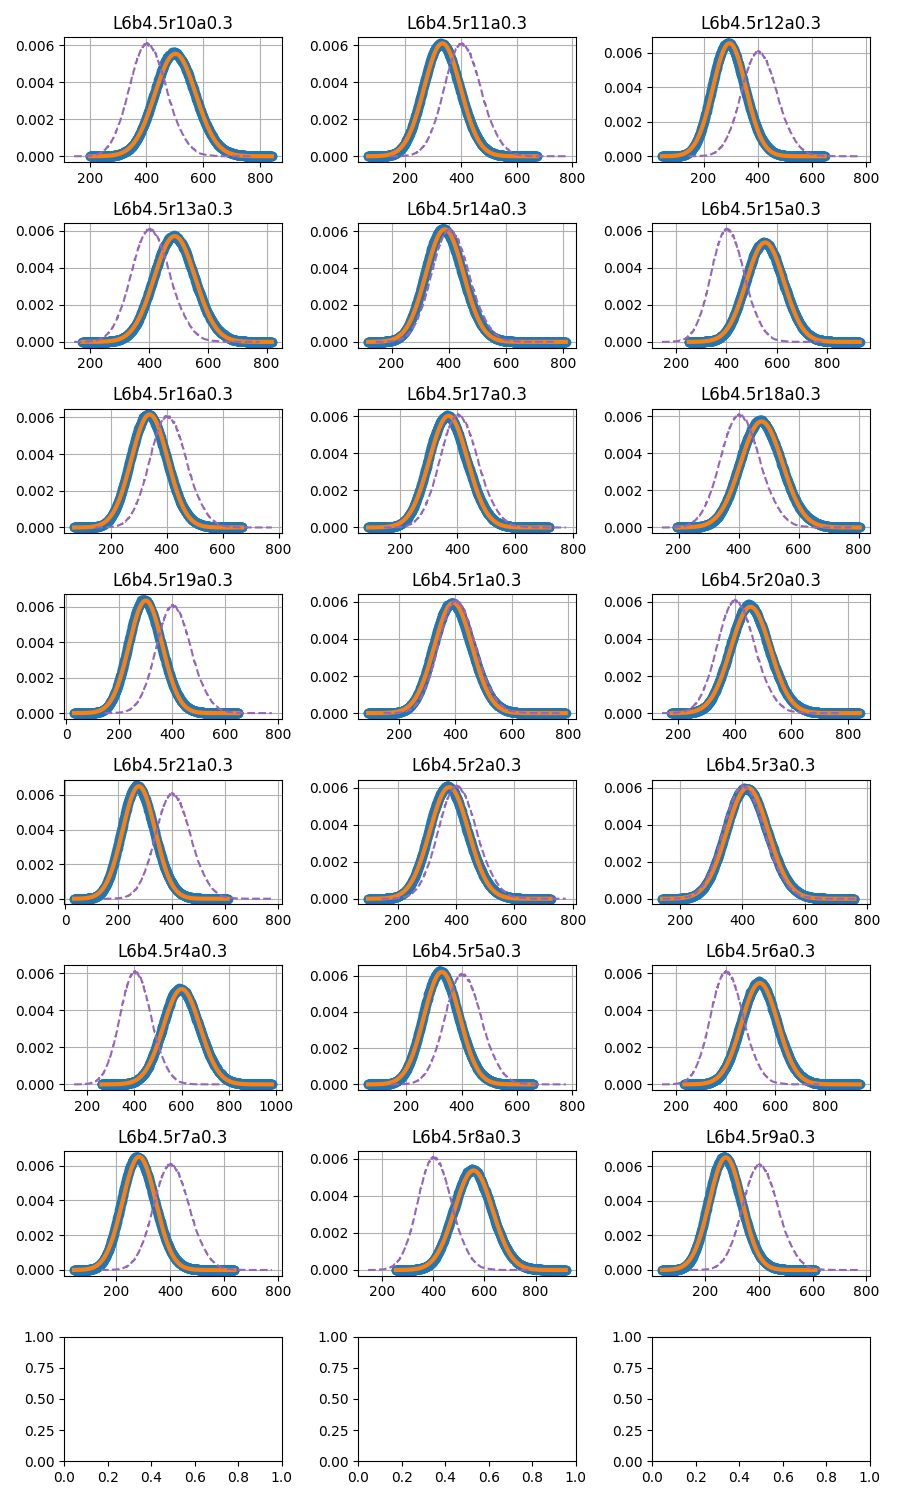

In [10]:
fnames = !ls ../runs/amp_0.3/L6/nmnm_L6b4.5*
fname_unif = '../repro_runs/m5.2L6/nmnm_m5.2L6b4.5_1.dat'
plot_nmnm(fnames, fname_unif)

### Analyze $L=6$, $\beta=5.0$

In [11]:
L, beta = 6, 5.0
dct_L6b50 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_0.3/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

['../runs/amp_0.3/L6/res_L6b5.0r11a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r14a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r8a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r17a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r13a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r21a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r20a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r18a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r12a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r16a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r7a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r6a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r19a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r3a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r9a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r5a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r2a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r15a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r1a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r10a0.3.dat', '../runs/amp_0.3/L6/res_L6b5.0r4a0.3.dat']


,replica_id,density,err_density,conv_density,g_im,err_g_im,conv_g_im,Z(mln)
0,11,0.147125,0.000164,T,0.146104,0.000674,T,267.900240
1,14,0.165056,0.000207,T,0.178215,0.001930,F,157.755026
2,8,0.215843,0.000359,T,0.260365,0.002383,T,54.167666
3,17,0.160265,0.000218,T,0.166457,0.000895,T,200.713842
4,13,0.194677,0.000411,T,0.222743,0.001849,T,78.222468
5,21,0.128334,0.000161,T,0.115287,0.000405,T,520.885032
6,20,0.188351,0.000316,F,0.212818,0.001443,T,104.859372
7,18,0.193633,0.000263,T,0.219379,0.002570,F,95.110834
8,12,0.136280,0.000106,T,0.127630,0.000399,T,506.293019
9,16,0.150256,0.000170,T,0.153147,0.000723,T,247.612277


0.18400593538915938 +/- 0.00035036190390189755


<IPython.core.display.Javascript object>


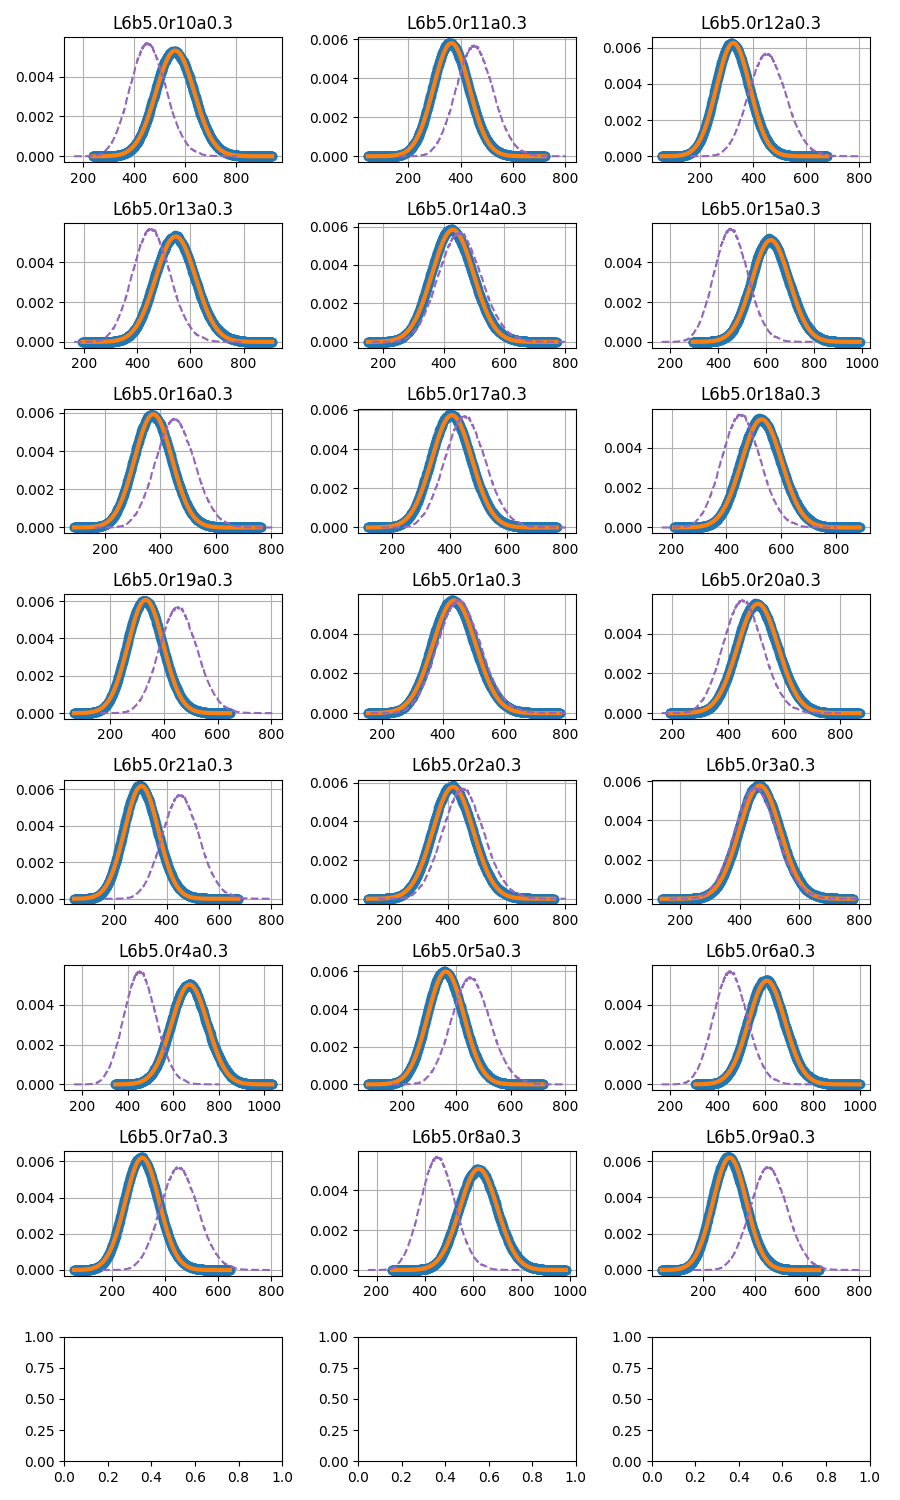

In [13]:
fnames = !ls ../runs/amp_0.3/L6/nmnm_L6b5.0*
fname_unif = '../repro_runs/m5.2L6/nmnm_m5.2L6b5.0_1.dat'
plot_nmnm(fnames, fname_unif)

## collect $L=6 $

In [14]:
df = pd.DataFrame([dct_L6b40, dct_L6b45, dct_L6b50])
df

# SAVE L=6
df.to_csv("m5.2amp0.3L6_av_replicas.dat")
print(df.to_csv())

,L,beta,g_im,err_g_im
0,6,4.0,0.11459728864131742,0.00016327059144471167
1,6,4.5,0.1558545730114924,0.0002444976582665181
2,6,5.0,0.18400593538915938,0.00035036190390189755



## Read in $L=6$ 

In [16]:
df_L6 = pd.read_csv("m5.2amp0.3L6_av_replicas.dat")
df_L6

,Unnamed: 0,L,beta,g_im,err_g_im
0,0,6,4.0,0.114597,0.000163
1,1,6,4.5,0.155855,0.000244
2,2,6,5.0,0.184006,0.000350


# Analyze $L=8$

### Analyze $L=8$, $\beta=4.0$

In [17]:
L, beta = 8, 4.0
dct_L8b40 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_0.3/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

['../runs/amp_0.3/L8/res_L8b4.0r1a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r7a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r3a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r8a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r20a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r16a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r11a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r10a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r9a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r12a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r18a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r15a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r4a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r5a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r19a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r2a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r6a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r14a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r21a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r17a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.0r13a0.3.dat']


,replica_id,density,err_density,conv_density,g_im,err_g_im,conv_g_im,Z(mln)
0,1,0.166104,0.000351,T,0.098240,0.000887,T,219.622719
1,7,0.138215,0.000270,T,0.055953,0.000393,T,511.676008
2,3,0.170211,0.000480,T,0.106007,0.001168,T,180.244335
3,8,0.195134,0.000518,T,0.152909,0.003337,T,95.525100
4,20,0.172473,0.000598,T,0.106235,0.002084,T,79.996124
5,16,0.139405,0.000298,T,0.057125,0.000519,T,353.192804
6,11,0.139516,0.000245,T,0.056896,0.000449,T,445.170229
7,10,0.191301,0.001026,F,0.144329,0.002201,T,75.175006
8,9,0.132936,0.000321,T,0.049933,0.000375,T,614.096090
9,12,0.141010,0.000381,T,0.060570,0.000519,T,420.946847


0.09914790489937808 +/- 0.00041093783420962103


In [18]:
fnames = !ls ../runs/amp_0.3/L8/nmnm_L8b4.0*
fname_unif = '../repro_runs/m5.2L8/nmnm_m5.2L8b4.0_1.dat'
plot_nmnm(fnames, fname_unif)

<IPython.core.display.Javascript object>

### Analyze $L=8$, $\beta=4.5$

In [19]:
L, beta = 8, 4.5
dct_L8b45 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_0.3/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

['../runs/amp_0.3/L8/res_L8b4.5r2a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r6a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r21a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r20a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r17a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r7a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r14a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r11a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r15a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r12a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r10a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r1a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r18a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r4a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r3a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r8a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r19a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r16a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r13a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r5a0.3.dat', '../runs/amp_0.3/L8/res_L8b4.5r9a0.3.dat']


,replica_id,density,err_density,conv_density,g_im,err_g_im,conv_g_im,Z(mln)
0,2,0.164372,0.000825,F,0.171017,0.003510,T,38.719309
1,6,0.206105,0.000992,T,0.263672,0.005946,T,15.551316
2,21,0.135924,0.000255,T,0.098304,0.000923,T,199.168874
3,20,0.172198,0.000851,T,0.184717,0.002956,T,39.601453
4,17,0.150504,0.000415,T,0.133035,0.001904,T,114.811361
5,7,0.135417,0.000359,T,0.099370,0.000795,T,232.360181
6,14,0.171750,0.000417,T,0.183444,0.002364,T,54.162416
7,11,0.136482,0.000245,T,0.100280,0.001371,F,218.785017
8,15,0.205430,0.000799,T,0.273507,0.008127,T,16.150672
9,12,0.139464,0.000290,T,0.108369,0.001198,F,199.722840


0.1668524141605754 +/- 0.0008129584985274428


<IPython.core.display.Javascript object>


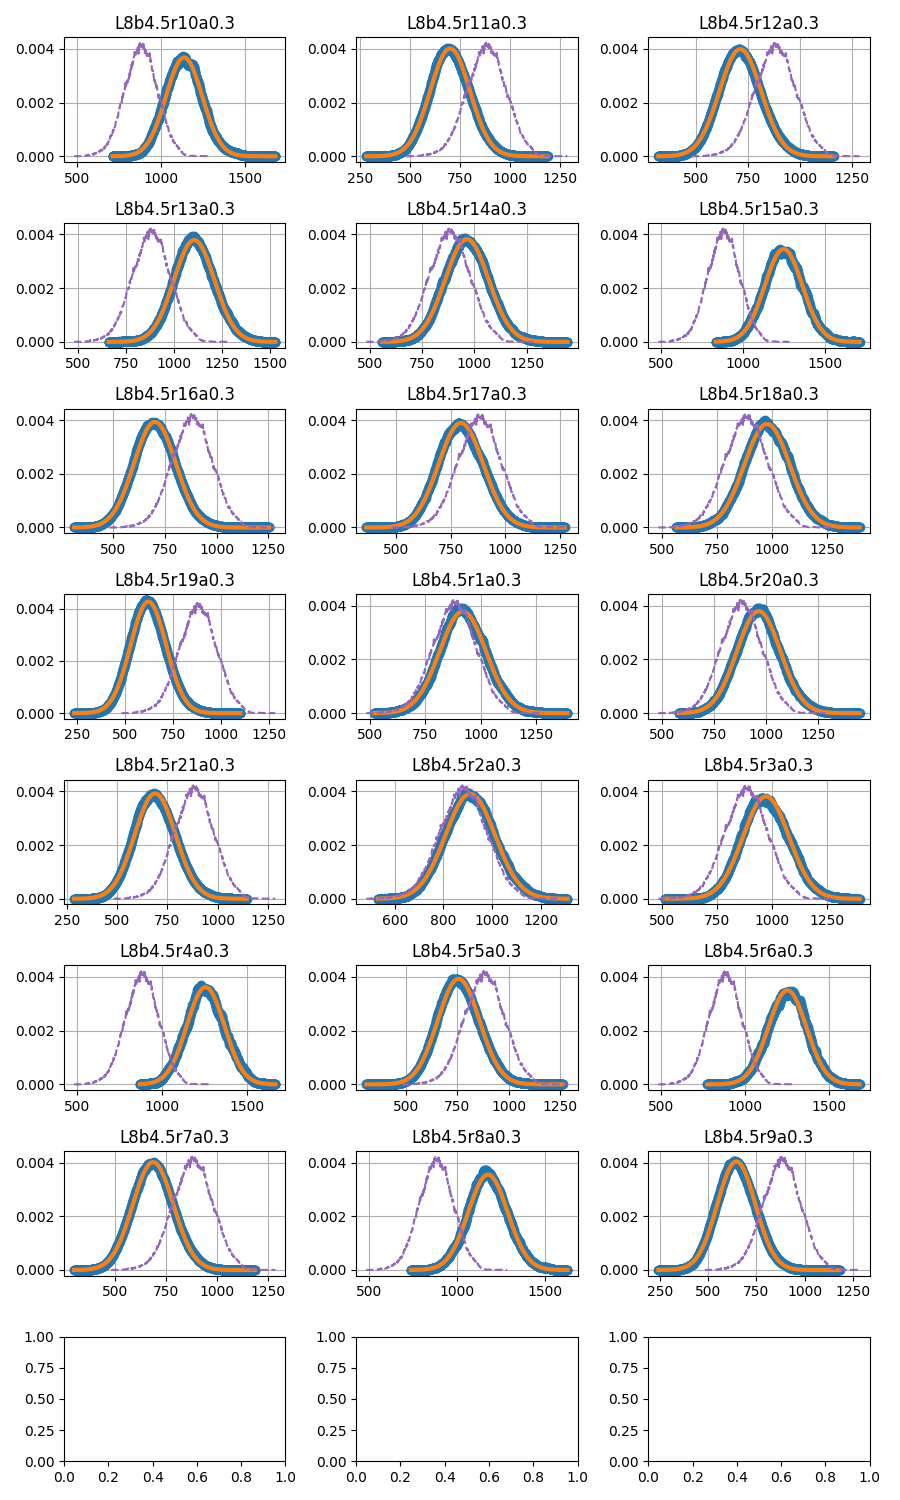

In [20]:
fnames = !ls ../runs/amp_0.3/L8/nmnm_L8b4.5*
fname_unif = '../repro_runs/m5.2L8/nmnm_m5.2L8b4.5_1.dat'
plot_nmnm(fnames, fname_unif)

### Analyze $L=8$, $\beta=5.0$

In [22]:
L, beta = 8, 5.0
dct_L8b50 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_0.3/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

['../runs/amp_0.3/L8/res_L8b5.0r6a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r18a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r21a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r11a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r10a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r14a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r16a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r3a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r9a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r17a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r4a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r7a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r5a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r8a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r15a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r12a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r1a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r20a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r2a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r13a0.3.dat', '../runs/amp_0.3/L8/res_L8b5.0r19a0.3.dat']


,replica_id,density,err_density,conv_density,g_im,err_g_im,conv_g_im,Z(mln)
0,6,0.207604,0.000743,T,0.308612,0.007046,T,18.145457
1,18,0.175008,0.000726,T,0.233909,0.005059,T,14.431233
2,21,0.136496,0.000540,T,0.145747,0.001922,T,68.747970
3,11,0.137084,0.000388,T,0.145552,0.001942,T,60.397115
4,10,0.193981,0.000691,T,0.284093,0.005426,T,20.499201
5,14,0.172986,0.000675,T,0.236437,0.007661,F,15.022885
6,16,0.137256,0.000411,T,0.145628,0.001828,T,63.750668
7,3,0.172884,0.000646,T,0.226261,0.004547,F,21.812875
8,9,0.129854,0.000244,T,0.128699,0.001208,T,146.383082
9,17,0.151420,0.000533,T,0.183216,0.002792,T,30.945943


0.21433274358392443 +/- 0.0011189296405790556


<IPython.core.display.Javascript object>


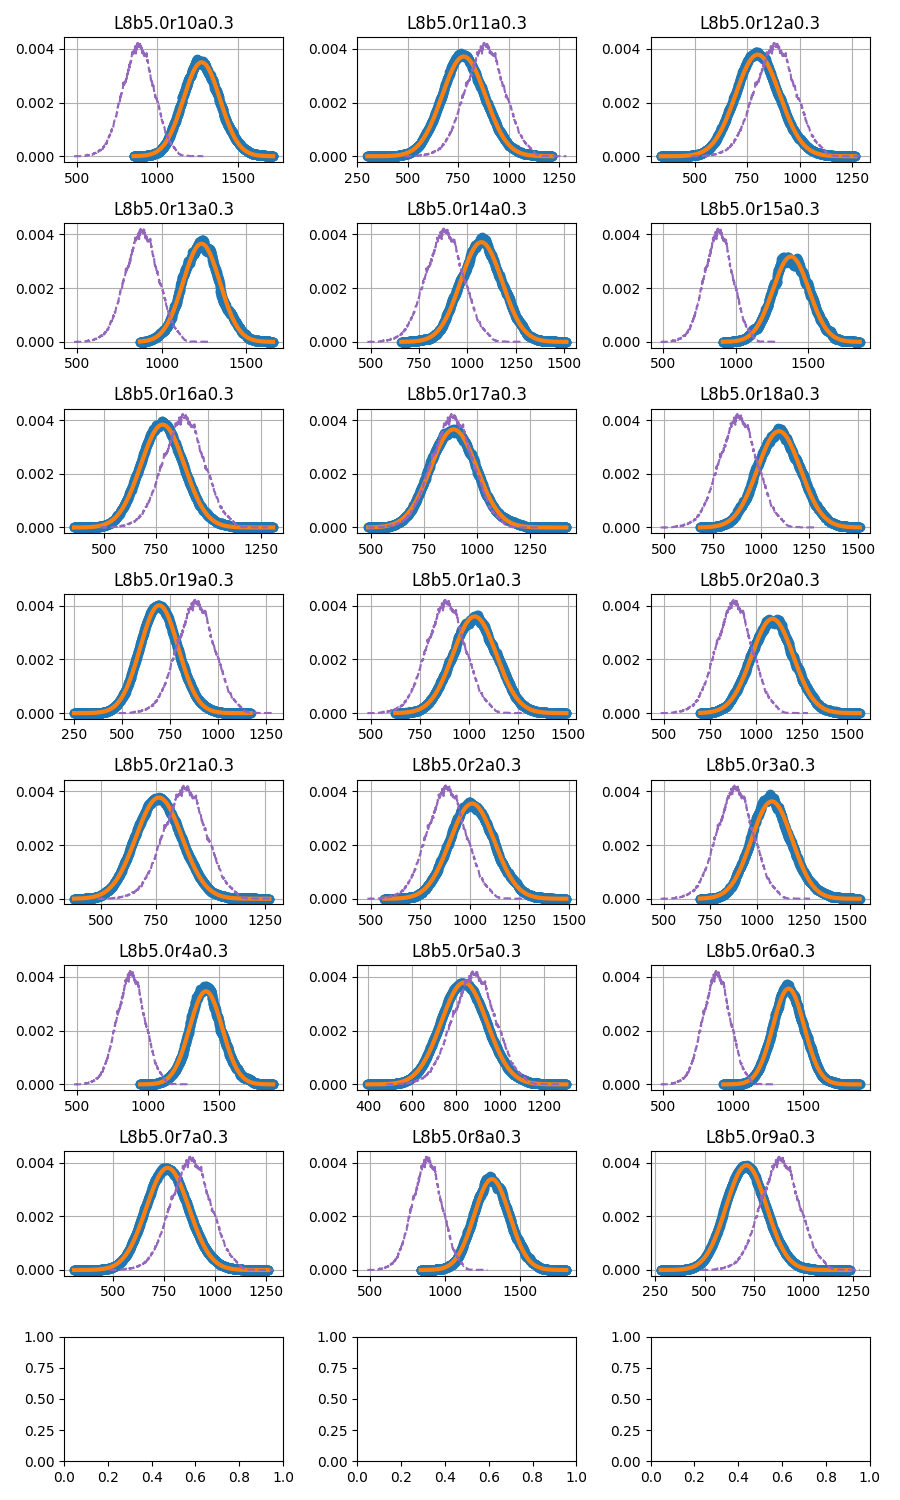

In [23]:
fnames = !ls ../runs/amp_0.3/L8/nmnm_L8b5.0*
fname_unif = '../repro_runs/m5.2L8/nmnm_m5.2L8b4.5_1.dat'
plot_nmnm(fnames, fname_unif)

## collect $L=8 $

In [30]:
df = pd.DataFrame([dct_L8b40, dct_L8b45, dct_L8b50])
df

,L,beta,g_im,err_g_im
0,8,4.0,0.099148,0.000411
1,8,4.5,0.166852,0.000813
2,8,5.0,0.214333,0.001119


In [31]:
# SAVE L=8
df.to_csv("m5.2amp0.3L8_av_replicas.dat")
print(df.to_csv())

,L,beta,g_im,err_g_im
0,8,4.0,0.09914790489937808,0.00041093783420962103
1,8,4.5,0.1668524141605754,0.0008129584985274428
2,8,5.0,0.21433274358392443,0.0011189296405790556



## Read in $L=8$ 

In [32]:
df_L8 = pd.read_csv("m5.2amp0.3L8_av_replicas.dat")
df_L8

,Unnamed: 0,L,beta,g_im,err_g_im
0,0,8,4.0,0.099148,0.000411
1,1,8,4.5,0.166852,0.000813
2,2,8,5.0,0.214333,0.001119


# Analyze $L=12$

### Analyze $L=12$, $\beta=4.2$

In [35]:
L, beta = 12, 4.2
dct_L12b42 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_0.3/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

['../runs/amp_0.3/L12/res_L12b4.2r18a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r21a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r5a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r12a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r6a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r14a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r4a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r15a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r7a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r8a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r17a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r10a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r13a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r20a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r3a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r19a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r2a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r16a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r1a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r11a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.2r9a0.3.dat']


,replica_id,density,err_density,conv_density,g_im,err_g_im,conv_g_im,Z(mln)
0,18,0.169411,0.001704,T,0.185058,0.017449,T,1.618264
1,21,0.127238,0.000649,T,0.032576,0.001611,T,16.898107
2,5,0.142334,0.001286,T,0.061055,0.004145,T,12.127104
3,12,0.136763,0.001067,F,0.044881,0.003318,T,10.004017
4,6,0.188581,0.002473,F,0.205368,0.018877,T,2.470841
5,14,0.163672,0.001498,T,0.106336,0.019985,T,2.896571
6,4,0.192149,0.001904,T,0.214890,0.021333,F,2.061007
7,15,0.184112,0.001977,F,0.252927,0.031371,T,0.998302
8,7,0.129799,0.000941,T,0.037463,0.001323,T,37.914173
9,8,0.180349,0.004510,F,0.227586,0.054270,F,1.224622


0.11608511486451357 +/- 0.004246969161268218


<IPython.core.display.Javascript object>


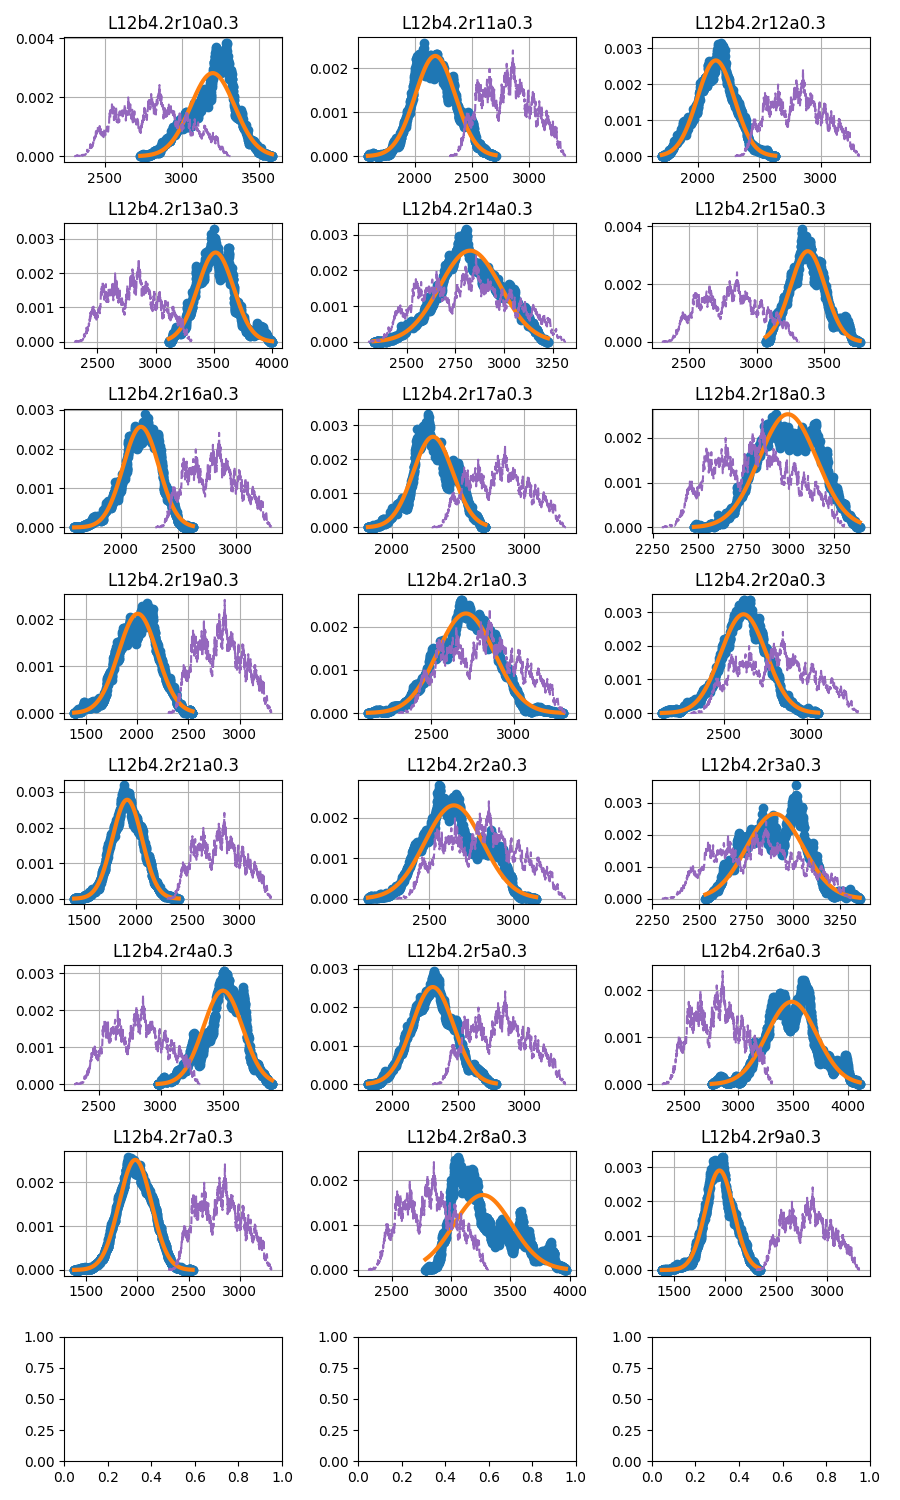

In [36]:
fnames = !ls ../runs/amp_0.3/L12/nmnm_L12b4.2*
fname_unif = '../repro_runs/m5.2L12/nmnm_m5.2L12b4.2_1.dat'
plot_nmnm(fnames, fname_unif)

### Analyze $L=12$, $\beta=4.55$

In [37]:
L, beta = 12, 4.55
dct_L12b455 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_0.3/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

['../runs/amp_0.3/L12/res_L12b4.55r5a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r8a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r16a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r6a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r19a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r1a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r14a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r15a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r11a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r13a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r17a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r2a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r9a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r12a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r20a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r7a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r10a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r4a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r21a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r3a0.3.dat', '../runs/amp_0.3/L12/res_L12b4.55r18a0.3.dat']


,replica_id,density,err_density,conv_density,g_im,err_g_im,conv_g_im,Z(mln)
0,5,0.144397,0.001493,F,0.156044,0.010724,T,2.484674
1,8,0.181482,0.001194,T,0.298954,0.056410,T,0.499174
2,16,0.135590,0.001341,T,0.101646,0.006704,T,6.041943
3,6,0.185935,0.002040,T,0.302800,0.041971,T,0.491198
4,19,0.132360,0.001161,T,0.086732,0.004670,T,7.156822
5,1,0.158271,0.002607,T,0.209905,0.021667,T,1.549750
6,14,0.164198,0.001085,T,0.207459,0.022092,T,1.476655
7,15,0.183281,0.002595,F,0.272493,0.028649,T,1.226362
8,11,0.136073,0.001670,F,0.101795,0.012753,F,4.476130
9,13,0.190641,0.002348,T,0.339212,0.056469,T,0.455464


0.18909731270438057 +/- 0.006378029170028929


<IPython.core.display.Javascript object>


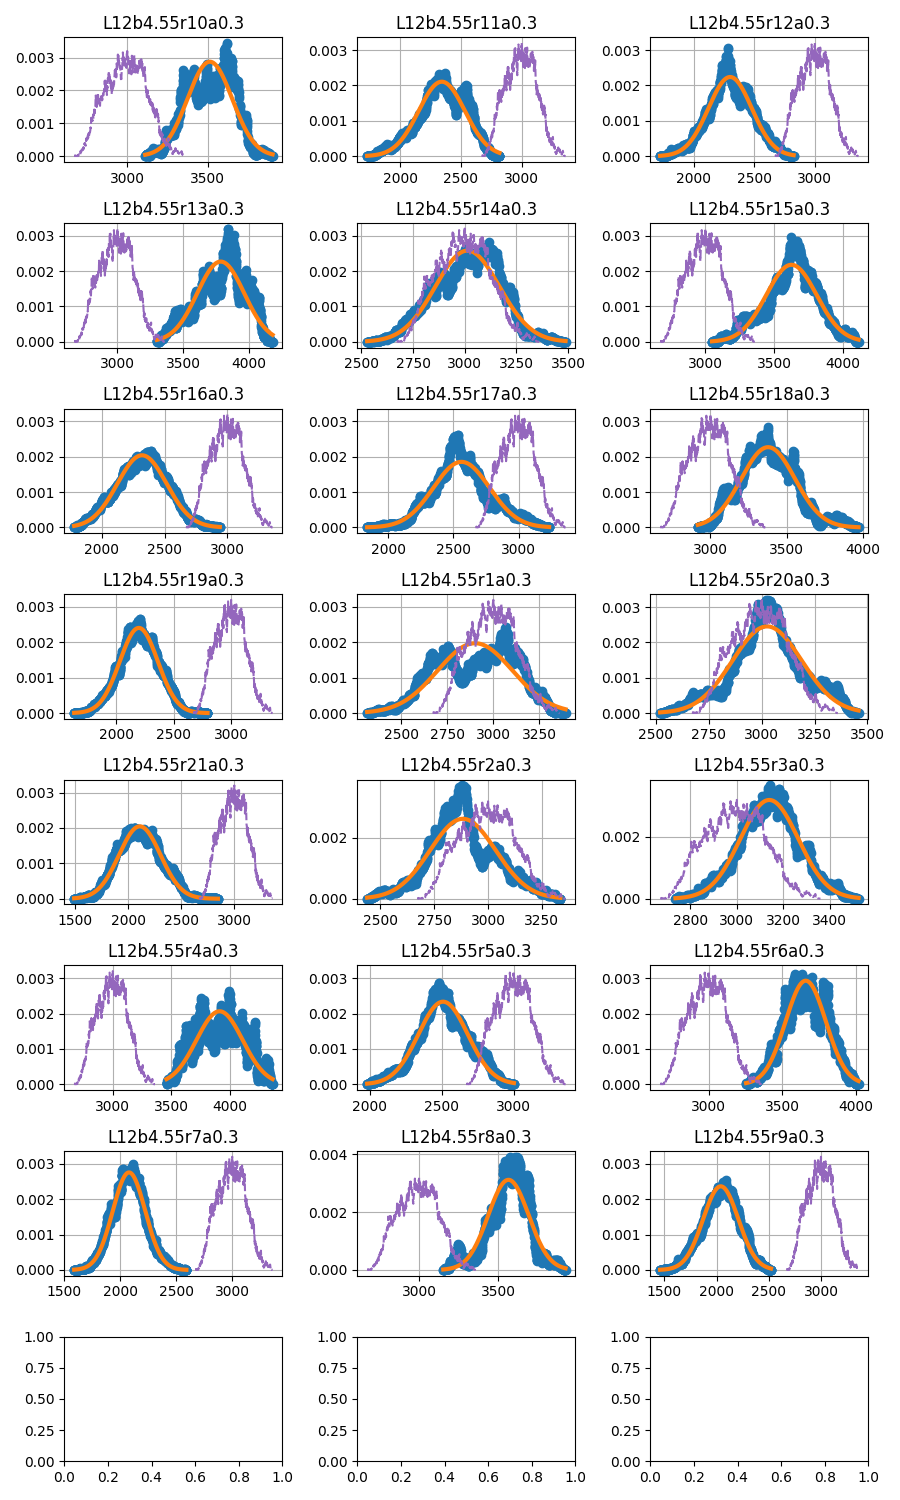

In [38]:
fnames = !ls ../runs/amp_0.3/L12/nmnm_L12b4.55*
fname_unif = '../repro_runs/m5.2L12/nmnm_m5.2L12b4.55_1.dat'
plot_nmnm(fnames, fname_unif)

## collect $L=12 $

In [39]:
df = pd.DataFrame([dct_L12b42, dct_L12b455])
df

,L,beta,g_im,err_g_im
0,12,4.20,0.116085,0.004247
1,12,4.55,0.189097,0.006378


In [40]:
# SAVE L=12
df.to_csv("m5.2amp0.3L12_av_replicas.dat")
print(df.to_csv())

,L,beta,g_im,err_g_im
0,12,4.2,0.11608511486451357,0.004246969161268218
1,12,4.55,0.18909731270438057,0.006378029170028929



## Read in $L=12$ 

In [41]:
df_L12 = pd.read_csv("m5.2amp0.3L12_av_replicas.dat")
df_L12

,Unnamed: 0,L,beta,g_im,err_g_im
0,0,12,4.20,0.116085,0.004247
1,1,12,4.55,0.189097,0.006378


# Read in and cross for Tc

In [42]:
df_L6 = pd.read_csv("m5.2amp0.3L6_av_replicas.dat")
df_L8 = pd.read_csv("m5.2amp0.3L8_av_replicas.dat")
df_L12 = pd.read_csv("m5.2amp1.0L12_av_replicas.dat")
df_L6L8L12 = pd.concat([df_L6, df_L8,df_L12])
df_L6L8L12

,Unnamed: 0,L,beta,g_im,err_g_im
0,0,6,4.00,0.114597,0.000163
1,1,6,4.50,0.155855,0.000244
2,2,6,5.00,0.184006,0.000350
0,0,8,4.00,0.099148,0.000411
1,1,8,4.50,0.166852,0.000813
2,2,8,5.00,0.214333,0.001119
0,0,12,4.20,0.065900,0.006414
1,1,12,4.55,0.116128,0.017188


<IPython.core.display.Javascript object>


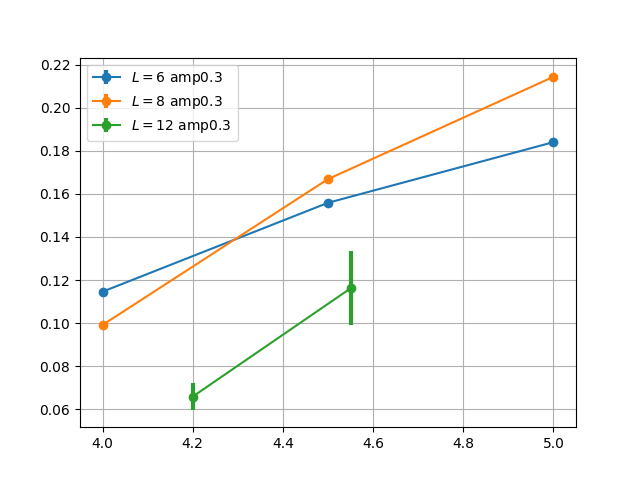

In [43]:
fig, ax = plt.subplots(1, 1)
    
for L, grp in df_L6L8L12.groupby("L"):
    ax.errorbar(grp["beta"], grp["g_im"], yerr=grp["err_g_im"],
                fmt='o-', elinewidth=3, label=r"$L=%s$ amp0.3" % L)

ax.legend(loc='best')
plt.grid(True)
plt.show()